<h1>客戶流失預測</h1>
<h4>目標：藉由客戶信用卡使用狀況，分析、預測客戶流失特徵，並藉此訂定相關客戶關係管理策略，以避免未來流失更多客戶。</h4>
<h4>資料來源：https://www.kaggle.com/sakshigoyal7/credit-card-customers </h4>
<h4>欄位資料：</h4>
<h4>CLIENTNUM(客戶編號)</h4>
<h4>Attrition_Flag(客戶狀態)</h4>
<h4>Customer_Age(年齡)</h4>
<h4>Gender(性別)</h4>
<h4>Dependent_count(家庭成員數)</h4>
<h4>Education_Level(教育程度)</h4>
<h4>Marital_Status(婚姻狀態)</h4>
<h4>Income_Category(收入)</h4>
<h4>Card_Category(信用卡類別)</h4>
<h4>Months_on_book(成為客戶時間長度)</h4>
<h4>Total_Relationship_Count(擁有產品數)</h4>
<h4>Months_Inactive_12_mon(近一年未使用信用卡消費月份總數)</h4>
<h4>Contacts_Count_12_mon(近一年聯繫次數)</h4>
<h4>Credit_Limit(信用卡額度上限)</h4>
<h4>Total_Revolving_Bal(循環信用餘額)</h4>
<h4>Avg_Open_To_Buy(近一年平均信用可用餘額)</h4>
<h4>Total_Amt_Chng_Q4_Q1(交易金額增長比率)</h4>
<h4>Total_Trans_Amt(近一年信用卡交易總額)</h4>
<h4>Total_Trans_Ct(近一年信用卡交易次數)</h4>
<h4>Total_Ct_Chng_Q4_Q1(交易次數增長比率)</h4>
<h4>Avg_Utilization_Ratio(平均使用信貸比率)</h4>


<h2>Step1資料讀取</h2>
* 先將資料從資料庫中讀取下來

In [1]:
import mysql.connector
import pandas as pd
import numpy as np
db=mysql.connector.connect(host='127.0.0.1',user='root',password='schecterc707',database='churners')
with db.cursor() as cursor:
    sql='SELECT * FROM customer'
    cursor.execute(sql)
    data=cursor.fetchall()
df=pd.DataFrame(data,columns=['CLIENTNUM','Attrition_Flag','Customer_Age','Gender','Dependent_count',
                             'Education_Level','Marital_Status','Income_Category','Card_Category',
                             'Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon',
                             'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy',
                             'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1',
                             'Avg_Utilization_Ratio'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<h2>Step2 EDA</h2>

In [2]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [3]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [4]:
df=df.drop(['CLIENTNUM'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

<h3>描述性統計分析</h3>

In [5]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


<h3>資料視覺化處理</h3>

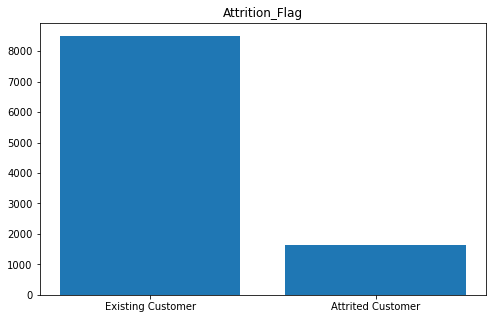

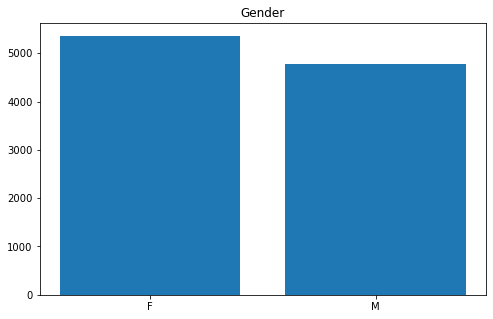

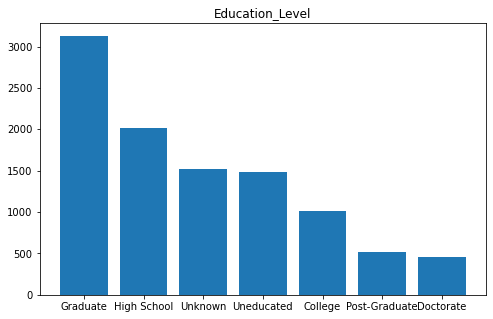

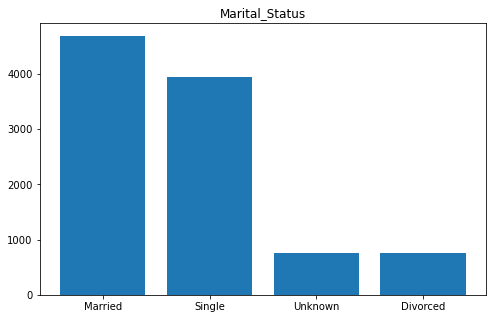

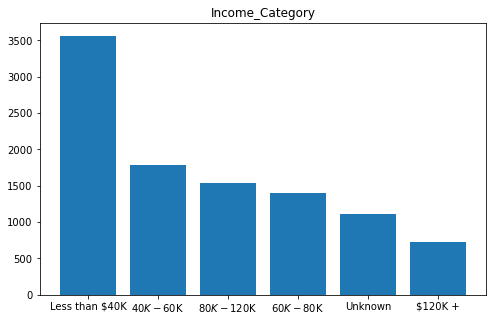

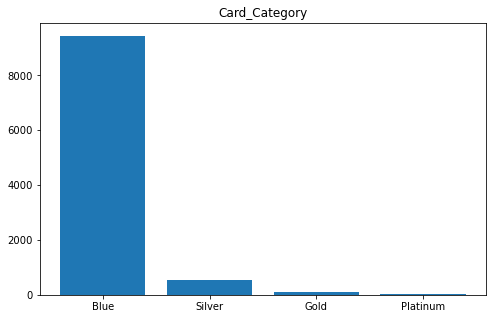

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
def nom_plot(nom_col):
    nom_data=df[nom_col]
    nom_data_counts=nom_data.value_counts()
    plt.figure(figsize=(8,5))
    plt.bar(nom_data_counts.index,nom_data_counts)
    plt.title(nom_col)
    plt.show()
nom=['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']
for i in nom:
    nom_plot(i)

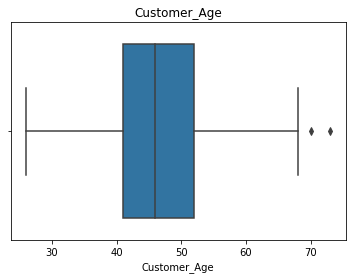

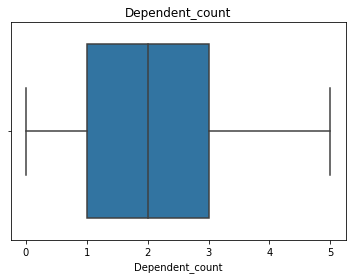

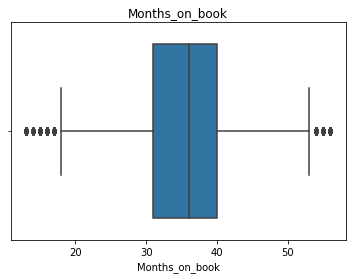

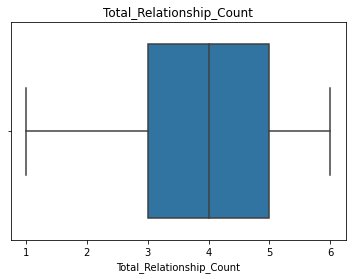

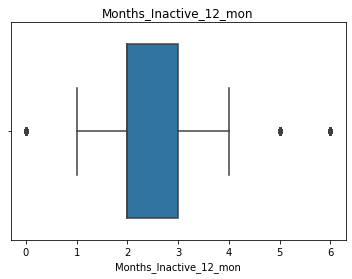

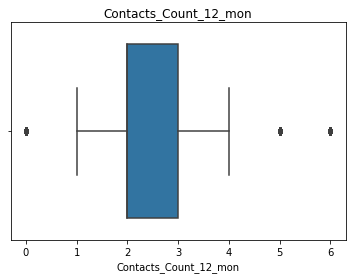

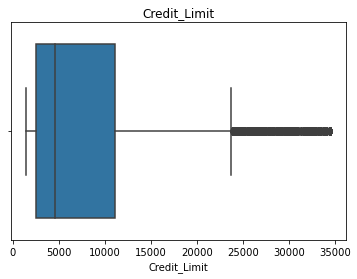

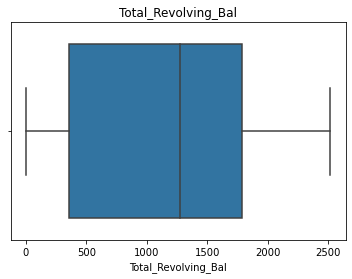

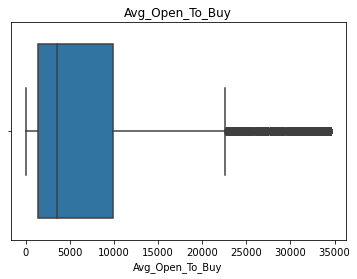

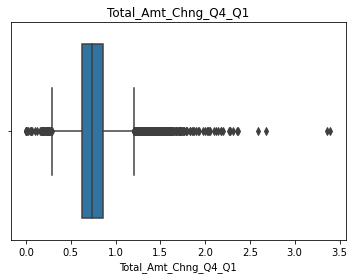

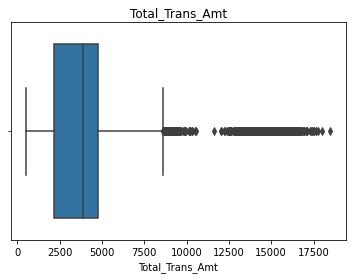

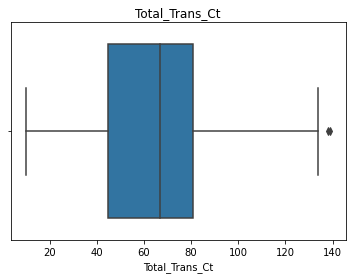

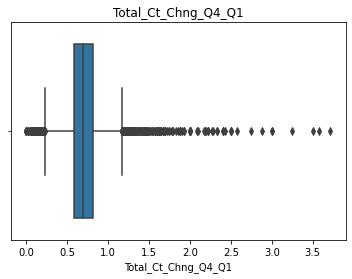

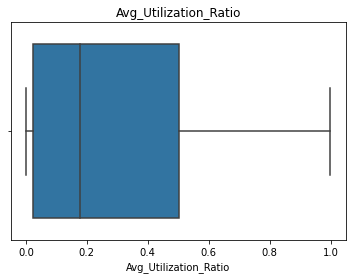

In [7]:
def num_plot(num_col):
    sns.boxplot(data=df,x=df[num_col])
    plt.title(num_col)
    plt.show()
num=['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon',
    'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
for i in num:
    num_plot(i)

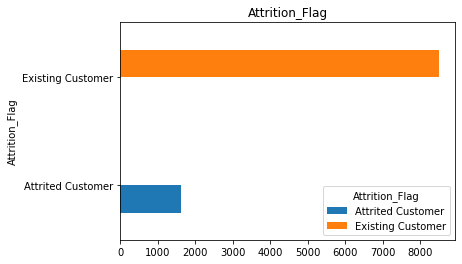

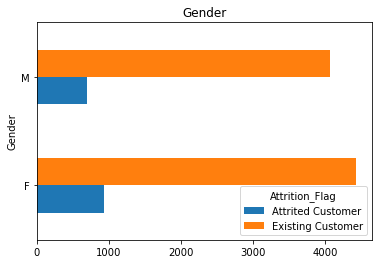

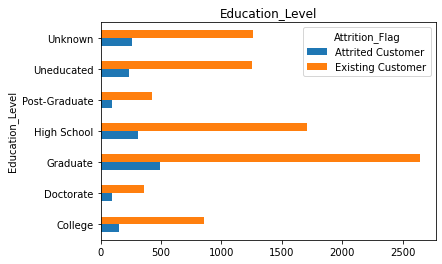

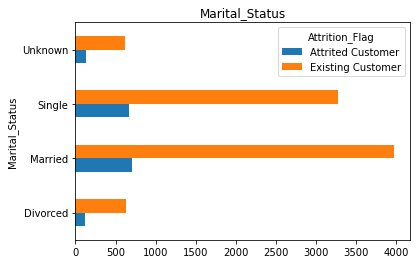

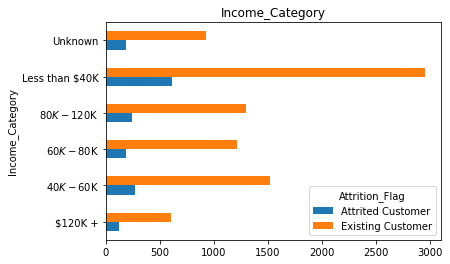

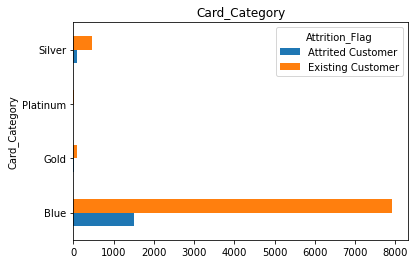

In [8]:
def nom_compare(nom_col):
    pd.crosstab(df[nom_col],df.Attrition_Flag).plot(kind='barh')
    plt.title(nom_col)
    plt.show()
for i in nom:
    nom_compare(i)

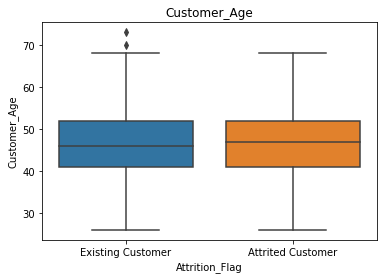

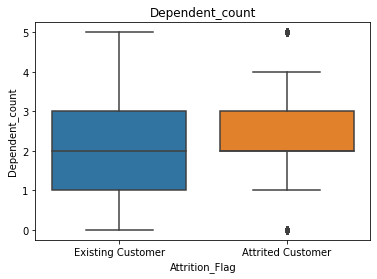

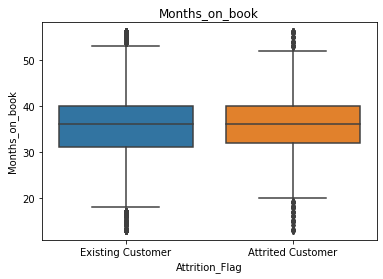

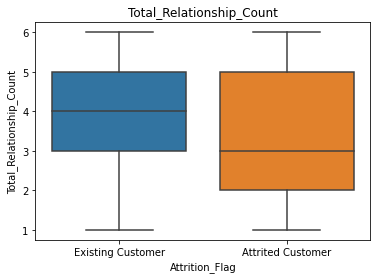

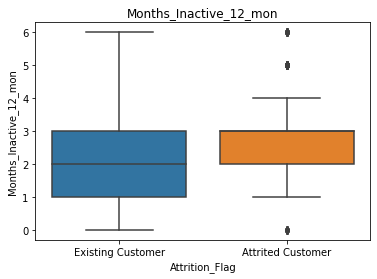

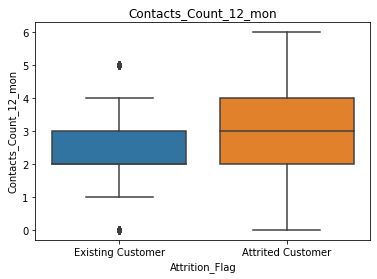

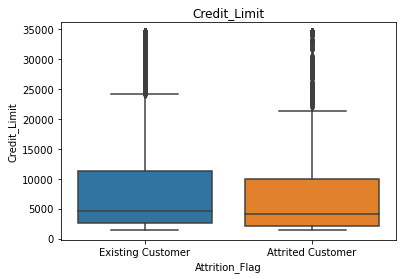

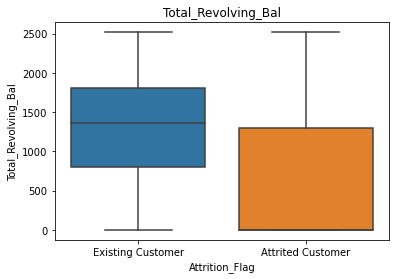

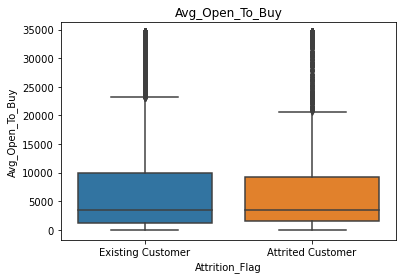

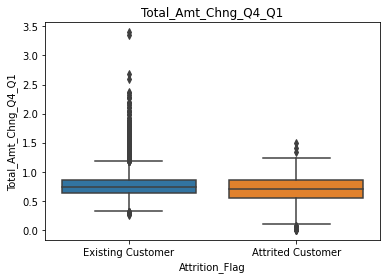

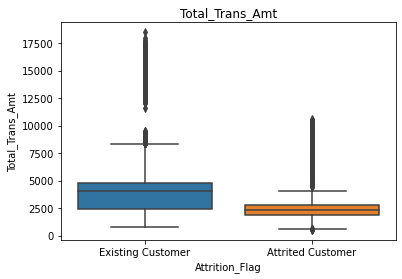

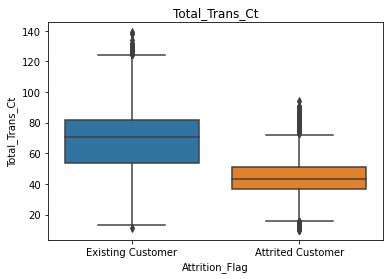

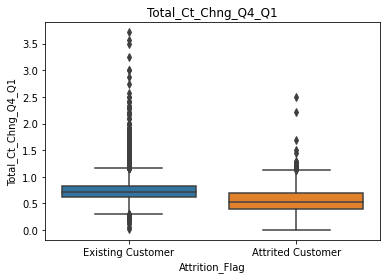

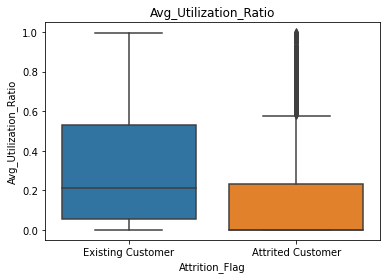

In [9]:
def num_compare(num_col):
    sns.boxplot(data=df,x=df.Attrition_Flag,y=df[num_col])
    plt.title(num_col)
    plt.show()
for i in num:
    num_compare(i)

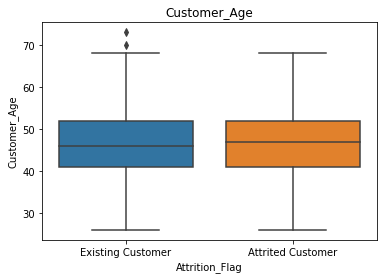

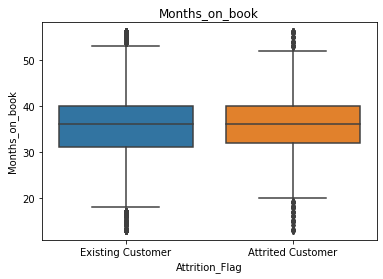

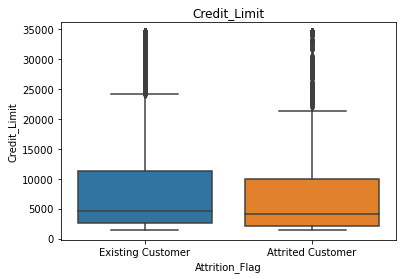

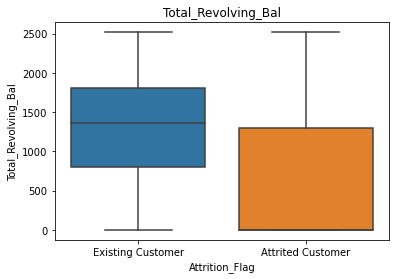

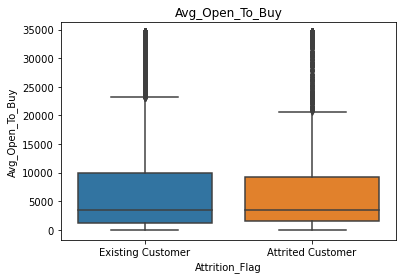

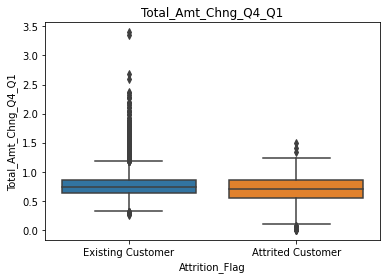

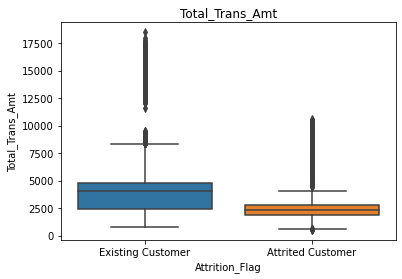

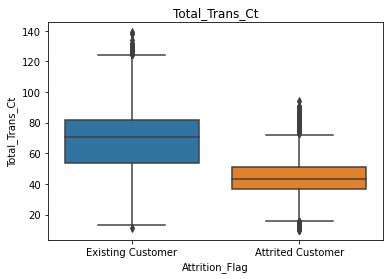

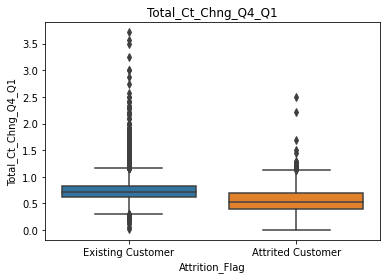

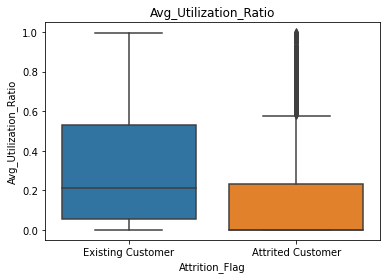

In [10]:
def num_compare2(num_col):
    sns.kdeplot(data=df,x=df[num_col],hue=df.Attrition_Flag)
    plt.title(num_col)
    plt.show()
num_2_1=['Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
for i in num_2_1:
    num_compare(i)

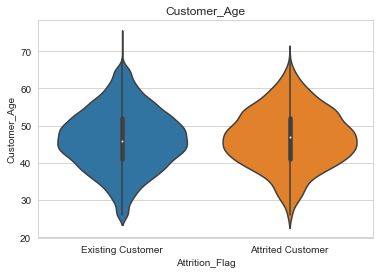

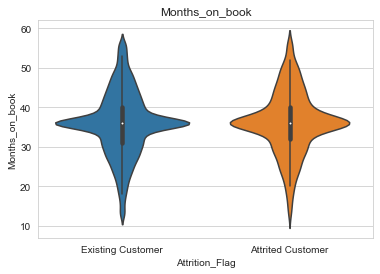

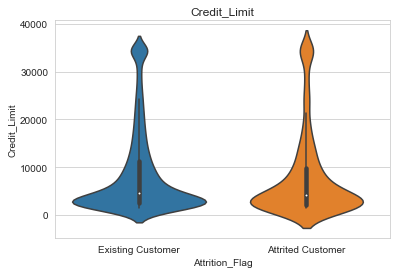

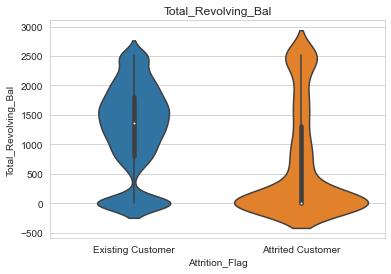

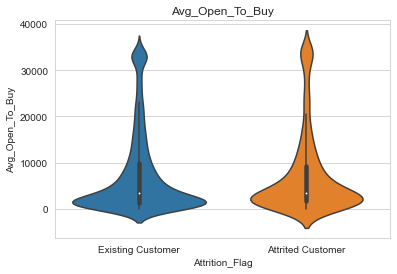

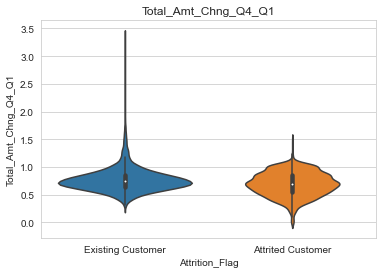

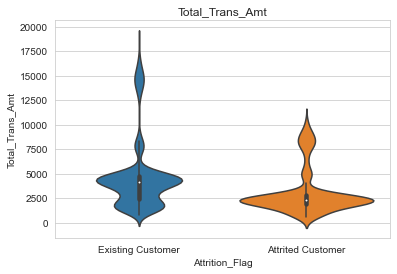

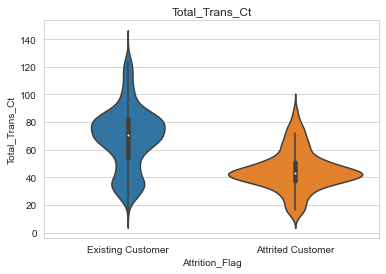

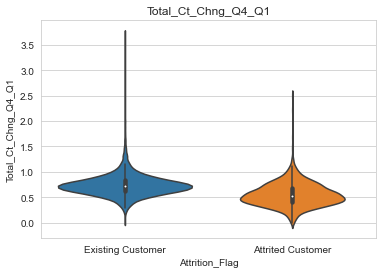

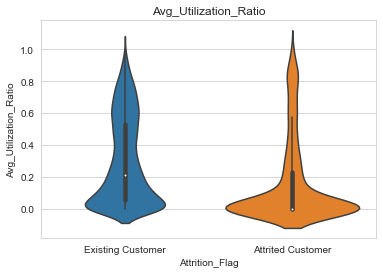

In [11]:
def num_compare3(num_col):
    sns.set_style('whitegrid')
    sns.violinplot(data=df,y=df[num_col],x='Attrition_Flag')
    plt.title(num_col)
    plt.show()
num_3_1=['Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
for i in num_3_1:
    num_compare3(i)

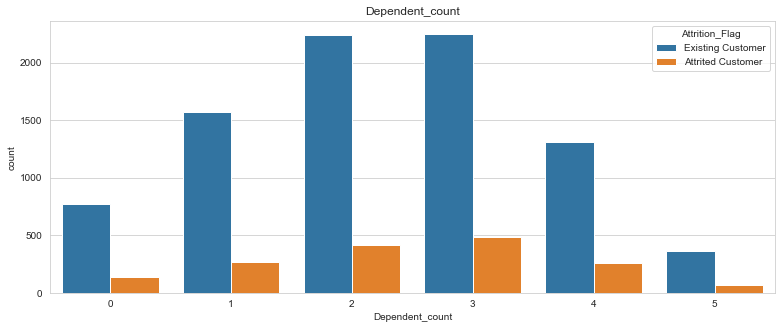

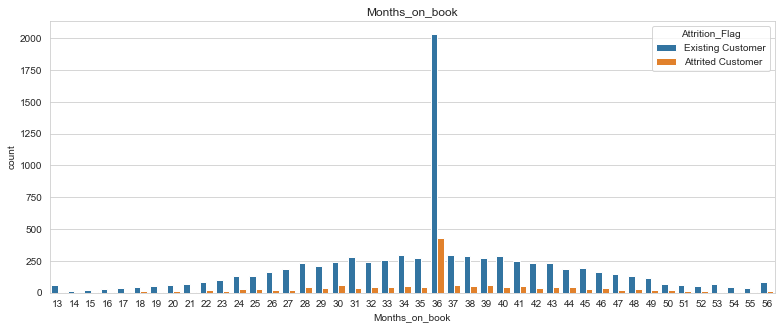

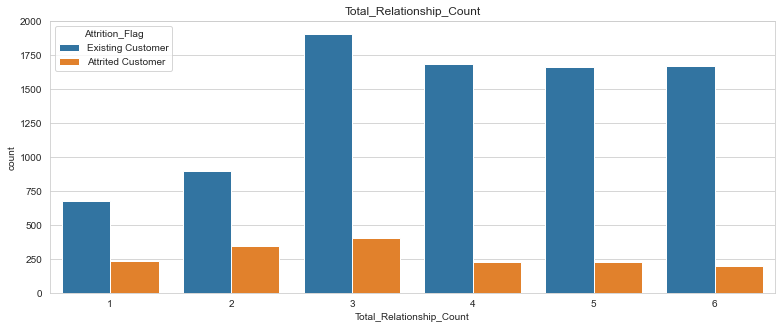

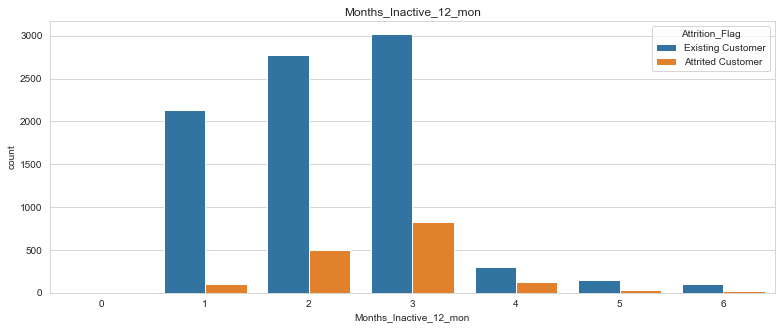

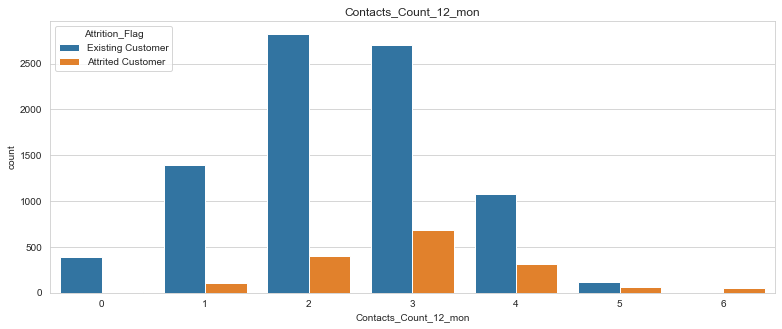

In [12]:
def num_compare4(num_col):
    plt.figure(figsize=(13,5))
    sns.countplot(data=df,x=df[num_col],hue=df.Attrition_Flag)
    plt.title(num_col)
    plt.show()
num_2_2=['Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon',
    'Contacts_Count_12_mon']
for i in num_2_2:
    num_compare4(i)

* 由此可發現到，該資料集屬於不平衡資料集。
* 大多流失的客戶，似乎都是持著藍卡。
* 當收入小於40K時，會流失的客戶似乎也比其他收入區間等級的人來的高。
* 大多會流失的客戶，其Total_Revolving_Bal(循環信用餘額)都不高。
* Total_Trans_Amt(近一年信用卡交易總額)越低的客戶，愈可能流失。
* Total_Trans_Ct(近一年信用卡交易次數)越低的客戶，愈可能流失。
* Avg_Utilization_Ratio(平均使用信貸比率)越低的客戶，愈可能流失。
* Total_Trans_Amt與Total_Trans_Ct都反映了信用卡的依賴度，當次數越低、總額越低，也反映出對於信用卡的依賴度不高。
* Avg_Utilization_Ratio不僅依樣反映出信用卡的使用情況以外，也反映了客戶的信用評比。在此會流失的客戶，其信用使用率通常不高。

<h2>Step3 資料清理與前處理
<h3>Label encoding</h3>

In [13]:
Card_Category_map={
    'Blue':0,
    'Silver':1,
    'Gold':2,
    'Platinum':3
}

Income_Category_map={
    'Unknown':-1,
    'Less than $40K':0,
    '$40K - $60K':1,
    '$60K - $80K':2,
    '$80K - $120K':3,
    '$120K +':4
}
Education_Level_map={
    'Unknown':-1,
    'Uneducated':0,
    'High School':1,
    'College':2,
    'Graduate':3,
    'Post-Graduate':4,
    'Doctorate':5
}

def trans_target(flag):
    if(flag=='Attrited Customer'):
        return(1)
    elif(flag=='Existing Customer'):
        return(0)
df['new_Attrition_Flag']=df['Attrition_Flag'].apply(trans_target)
df['Education_Level']=df['Education_Level'].map(Education_Level_map)
df['Card_Category']=df['Card_Category'].map(Card_Category_map)
df['Income_Category']=df['Income_Category'].map(Income_Category_map)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [14]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,new_Attrition_Flag
0,Existing Customer,45,F,3,1,Married,0,0,36,4,...,3,3544.0,1661,1883.0,0.831,15149,111,0.734,0.469,0
1,Attrited Customer,58,M,0,-1,Single,1,0,45,3,...,3,3421.0,2517,904.0,0.992,992,21,0.400,0.736,1
2,Attrited Customer,46,M,3,5,Divorced,3,0,38,6,...,3,8258.0,1771,6487.0,0.000,1447,23,0.000,0.214,1
3,Existing Customer,34,F,2,0,Single,0,0,24,6,...,2,1438.3,0,1438.3,0.827,3940,82,0.952,0.000,0
4,Existing Customer,49,F,2,0,Married,-1,0,41,3,...,2,3128.0,749,2379.0,0.598,4369,59,0.735,0.239,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,0,0,Married,2,0,46,4,...,3,3640.0,659,2981.0,0.938,3756,70,0.842,0.181,0
10123,Attrited Customer,38,M,3,2,Single,2,0,34,6,...,4,12050.0,1821,10229.0,0.630,2381,40,0.481,0.151,1
10124,Attrited Customer,49,F,3,1,Married,0,0,45,3,...,3,2951.0,2437,514.0,0.765,2519,36,0.565,0.826,1
10125,Existing Customer,54,M,4,3,Married,4,0,50,4,...,0,2872.0,2035,837.0,0.613,1770,47,0.741,0.709,0


<h3>相關分析</h3>

* 一般來說，相關分析應該為EDA流程所需做的事情。但經由先前的EDA發現，有些類別變項有可能有先後、等級之間的關係，因此決定進行Label encoing等資料前處理後，再進行更進一步的EDA。

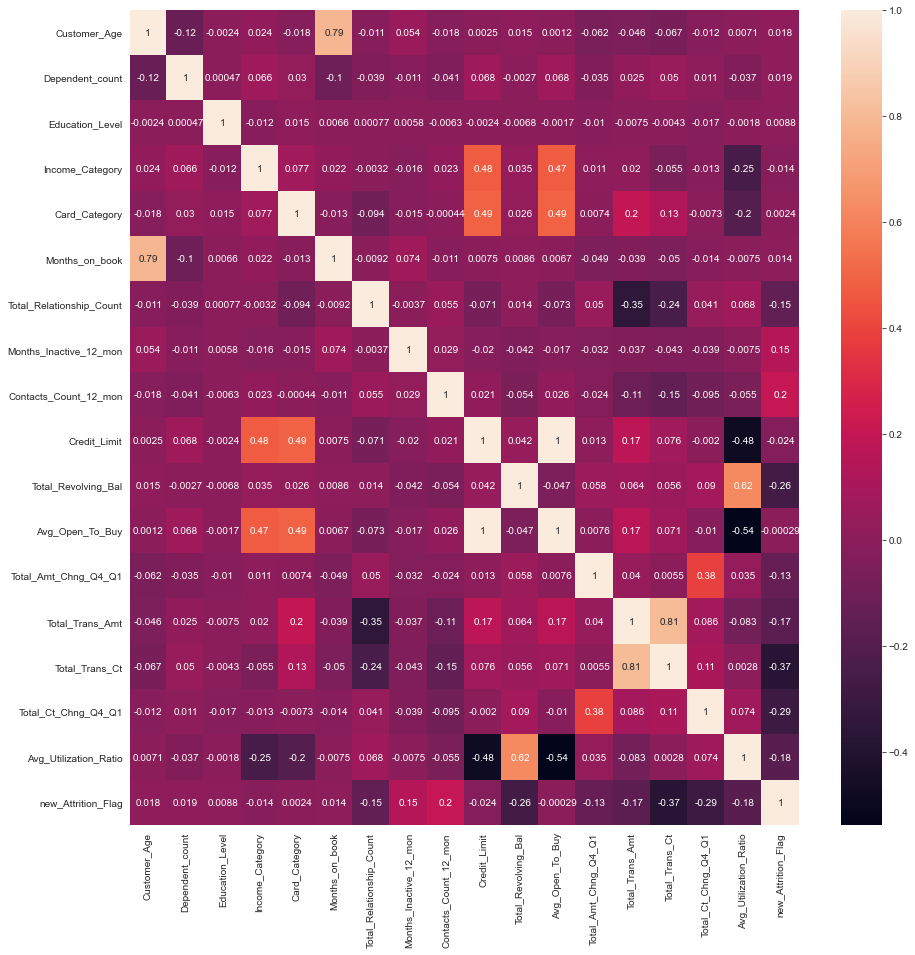

In [15]:
df=df.drop(['Attrition_Flag'],axis=1)
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,ax=ax)
plt.show()

* 首先可以發現到，Total_Trans_Ct(近一年信用卡交易次數)，與目標變項成中度負相關，相關係數為-0.37，意即客戶信用卡使用率越低，愈可能有流失風險，與先前推論結果相符。
* 另外發現Total_Revolving_Bal(循環信用餘額)與Avg_Utilization_Ratio(平均使用信貸比率)相關係數相當高，為0.62中度正相關，意即循環信用餘額愈高，其平均信貸也愈高。
* 信用卡額度限制(Credit_Limit)與Avg_Utilization_Ratio(平均使用信貸比率)成中度負相關，意即信用卡限額越低，其循環信貸越高。此一現象似乎除了說明信用額度較低的人，他們對於信用卡的依賴相當高外，同時也說明了他們可能有過度消費、金錢控管能力不佳的問題。但若信貸使用率未超過30%，基本上是沒有上述信用可能不良的問題。頂多只是說明這些族群，較習慣利用信用卡代替現金而已。
* Avg_Open_to_buy是指12月來，信用卡剩餘可使用額度。因此可發現與Total_Revolving_Bal(循環信用餘額)成中度負相關。意即卡片使用率愈低(因此可用餘額越多)，其循環信用餘額相對會較低，屬於相當正常的情況。


<h3>One Hot Encoding

In [16]:
backupdata=df
columns=df.select_dtypes(include=[object]).columns
df=pd.concat([df,pd.get_dummies(df[columns])],axis=1)
df=df.drop(['Gender','Marital_Status'],axis=1)
df['Attrition_Flag']=df['new_Attrition_Flag']
df=df.drop(['new_Attrition_Flag'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Dependent_count           10127 non-null  int64  
 2   Education_Level           10127 non-null  int64  
 3   Income_Category           10127 non-null  int64  
 4   Card_Category             10127 non-null  int64  
 5   Months_on_book            10127 non-null  int64  
 6   Total_Relationship_Count  10127 non-null  int64  
 7   Months_Inactive_12_mon    10127 non-null  int64  
 8   Contacts_Count_12_mon     10127 non-null  int64  
 9   Credit_Limit              10127 non-null  float64
 10  Total_Revolving_Bal       10127 non-null  int64  
 11  Avg_Open_To_Buy           10127 non-null  float64
 12  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 13  Total_Trans_Amt           10127 non-null  int64  
 14  Total_

In [17]:
data=df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Dependent_count           10127 non-null  int64  
 2   Education_Level           10127 non-null  int64  
 3   Income_Category           10127 non-null  int64  
 4   Card_Category             10127 non-null  int64  
 5   Months_on_book            10127 non-null  int64  
 6   Total_Relationship_Count  10127 non-null  int64  
 7   Months_Inactive_12_mon    10127 non-null  int64  
 8   Contacts_Count_12_mon     10127 non-null  int64  
 9   Credit_Limit              10127 non-null  float64
 10  Total_Revolving_Bal       10127 non-null  int64  
 11  Avg_Open_To_Buy           10127 non-null  float64
 12  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 13  Total_Trans_Amt           10127 non-null  int64  
 14  Total_

In [18]:
x=data.iloc[:,0:23]
y=data.iloc[:,23]
x
#因為在這裡我皆用以決策樹為基底的演算法，因此就不需要進行資料標準化。但若今天使用的是Regression等涉及距離的演算法，就必須進行資料的標準化。
#from sklearn.preprocessing import StandardScaler
#sd=StandardScaler().fit(x)
#x=sd.transform(x)
#print('Mean:',x.mean(axis=0))
#print('Sd:',x.std(axis=0))

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,45,3,1,0,0,36,4,3,3,3544.0,...,15149,111,0.734,0.469,1,0,0,1,0,0
1,58,0,-1,1,0,45,3,1,3,3421.0,...,992,21,0.400,0.736,0,1,0,0,1,0
2,46,3,5,3,0,38,6,3,3,8258.0,...,1447,23,0.000,0.214,0,1,1,0,0,0
3,34,2,0,0,0,24,6,2,2,1438.3,...,3940,82,0.952,0.000,1,0,0,0,1,0
4,49,2,0,-1,0,41,3,5,2,3128.0,...,4369,59,0.735,0.239,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,0,0,2,0,46,4,1,3,3640.0,...,3756,70,0.842,0.181,0,1,0,1,0,0
10123,38,3,2,2,0,34,6,3,4,12050.0,...,2381,40,0.481,0.151,0,1,0,0,1,0
10124,49,3,1,0,0,45,3,2,3,2951.0,...,2519,36,0.565,0.826,1,0,0,1,0,0
10125,54,4,3,4,0,50,4,2,0,2872.0,...,1770,47,0.741,0.709,0,1,0,1,0,0


<h3>Resampling</h3>

* 先前提到，該資料集為不平衡資料集，故原則上場會以resampling的方式進行平衡。

* Resmapling方式大概分有Oversampling與Undersampling，也可以結合兩種方式。

* 在此主要採用Oversampling的方式進行，而該方法也是最廣為人用的方式。

In [19]:
#Resampling前
data['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [20]:
#最常用的oversampling方式為SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
x_res,y_res=SMOTE(random_state=111).fit_resample(x_train,y_train)
y_res.value_counts() #顯示resampling後的結果，可以發現目標變項以平衡。

1    5949
0    5949
Name: Attrition_Flag, dtype: int64

<h2>Step4 Modeling</h2>
<h3>建立建模function

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import time
accuracy={}
f1={}
auc={}
speed={}
def modeling(x,y,model,title):
    start=time.time()
    model.fit(x,y)
    end=time.time()
    sec=end-start
    speed[title]=sec
    model_pred=model.predict(x_test)
    model_accuracy=accuracy_score(y_test,model_pred)
    accuracy[title]=model_accuracy
    model_f1=f1_score(y_test,model_pred)
    f1[title]=model_f1
    auc_pred=model.predict_proba(x_test)[:,1]
    model_auc=roc_auc_score(y_test,auc_pred)
    auc[title]=model_auc
    cm=confusion_matrix(y_test,model_pred)
    sns.heatmap(cm,annot=True,fmt='.2f')
    plt.title(title)
    plt.show()
    
    print(classification_report(y_test,model_pred))
    print('Accuracy:%.2f'%(model_accuracy))
    print('F1 score:%.2f'%(model_f1))
    print('AUC:%.2f'%(model_auc))
    print('Times:%.2f'%(sec))
    result_form=pd.DataFrame({
                         'Accuracy':accuracy,
                         'F1':f1,
                         'AUC':auc,
                         'Speed(s)':speed})
    return result_form

<h3>Learning Curve

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
def learning_curve_score(model,title):
    k=StratifiedKFold(n_splits=5,shuffle=True)
    train_sizes,train_score,test_score=learning_curve(model,x,y,cv=k,scoring='accuracy',n_jobs=-1,train_sizes=np.linspace(0.01,1.0,8))
    
    train_score_mean=np.mean(train_score,axis=1)
    train_score_std=np.std(train_score,axis=1)
    test_score_mean=np.mean(test_score,axis=1)
    test_score_std=np.std(test_score,axis=1)
    
    plt.fill_between(train_score_mean-train_score_std,train_score_mean+train_score_std,color='r',alpha=0.1)
    plt.fill_between(test_score_mean-test_score_std,test_score_mean+test_score_std,color='g',alpha=0.1)
    
    plt.plot(train_sizes,train_score_mean,'-o',color='r',label='Training')
    plt.plot(train_sizes,test_score_mean,'-o',color='g',label='Cross_Validation')
    
    plt.grid(True)
    plt.ylabel('Score')
    plt.title(title)
    plt.legend()
    plt.show()

In [23]:
def learning_curve_loss(model,title):
    k=StratifiedKFold(n_splits=5,shuffle=True)
    train_sizes,train_loss,test_loss=learning_curve(model,x,y,cv=k,scoring='neg_log_loss',n_jobs=-1,train_sizes=np.linspace(0.01,1.0,8))
    
    train_loss_mean=-np.mean(train_loss,axis=1)
    test_loss_mean=-np.mean(test_loss,axis=1)
    
    plt.plot(train_sizes,train_loss_mean,'-o',color='r',label='Training')
    plt.plot(train_sizes,test_loss_mean,'-o',color='g',label='Cross_Validation')
    
    plt.grid(True)
    plt.ylabel('loss')
    plt.title(title)
    plt.legend()
    plt.show()

<h3>利用Random Search找出Random Forest之最佳參數</h3>

In [71]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
k=StratifiedKFold(n_splits=5,shuffle=True)
rfc_params={
    'randomforestclassifier__n_estimators':randint(1,1000),
    'randomforestclassifier__max_depth':randint(3,20),
    'randomforestclassifier__min_samples_leaf':randint(1,100),
    'randomforestclassifier__random_state':[101]
}
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
smote_rfc_pipe=make_pipeline(SMOTE(random_state=101),RandomForestClassifier())
rfc_smote_optimal=RandomizedSearchCV(smote_rfc_pipe,rfc_params,n_iter=10,cv=k,scoring='f1',n_jobs=-1)
rfc_smote_optimal.fit(x_train,y_train)
print(rfc_smote_optimal.best_params_)
print(rfc_smote_optimal.best_score_)

{'randomforestclassifier__max_depth': 12, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__n_estimators': 585, 'randomforestclassifier__random_state': 101}
0.8561094978669412


<h3>Random Forest建模</h3>

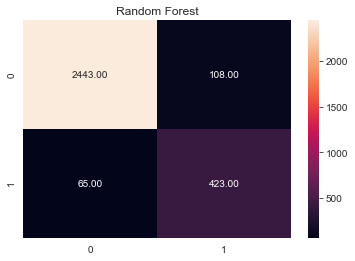

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2551
           1       0.80      0.87      0.83       488

    accuracy                           0.94      3039
   macro avg       0.89      0.91      0.90      3039
weighted avg       0.95      0.94      0.94      3039

Accuracy:0.94
F1 score:0.83
AUC:0.98
Times:6.75


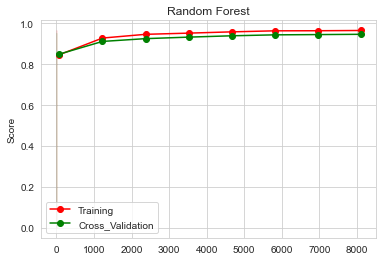

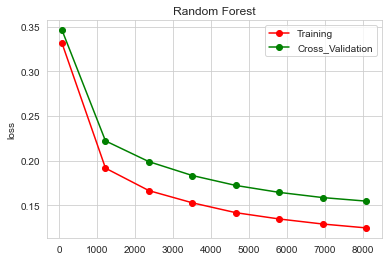

,Accuracy,F1,AUC,Speed(s)
Random Forest,0.943073,0.830226,0.981154,6.751461


In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
x_res,y_res=SMOTE(random_state=101).fit_resample(x_train,y_train)
model=RandomForestClassifier(n_estimators=585,max_depth=17,min_samples_leaf=10,random_state=101)
title='Random Forest'
form=modeling(x_res,y_res,model,title)
learning_curve_score(model,title)
learning_curve_loss(model,title)
form

* 於此參數與Random Search調教出來不同，原因在於經過Learning Curve的檢視後，發現有點overfitting或是underfitting的情況產生，故會進行一些手動微調，以達到較理想的目標。

<h3>利用Random Search找出Gradient Boosting之最佳參數</h3>

In [81]:
grad_params={
    'gradientboostingclassifier__n_estimators':randint(100,1000),
    'gradientboostingclassifier__max_depth':randint(3,20),
    'gradientboostingclassifier__max_features':[0.5,0.6,0.7,0.8,0.9,1],
    'gradientboostingclassifier__subsample':[0.5,0.6,0.7,0.8,0.9,1],
    'gradientboostingclassifier__learning_rate':[0.01,0.03,0.05,0.07,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'gradientboostingclassifier__random_state':[101]
}
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
grad_smote_pipe=make_pipeline(SMOTE(random_state=101),GradientBoostingClassifier())
grad_smote_optimal=RandomizedSearchCV(grad_smote_pipe,grad_params,n_iter=10,cv=k,scoring='f1',n_jobs=-1)
grad_smote_optimal.fit(x_train,y_train)
print(grad_smote_optimal.best_params_)
print(grad_smote_optimal.best_score_)

{'gradientboostingclassifier__learning_rate': 0.09, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__max_features': 0.6, 'gradientboostingclassifier__n_estimators': 909, 'gradientboostingclassifier__random_state': 101, 'gradientboostingclassifier__subsample': 0.9}
0.9140930948314592


<h3>Gradient Boosting建模</h3>

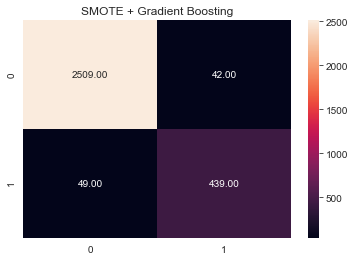

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2551
           1       0.91      0.90      0.91       488

    accuracy                           0.97      3039
   macro avg       0.95      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

Accuracy:0.97
F1 score:0.91
AUC:0.99
Times:14.79


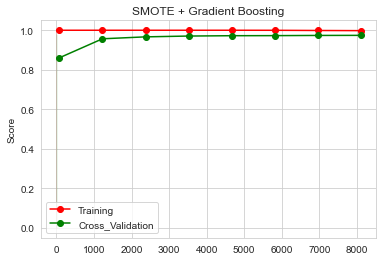

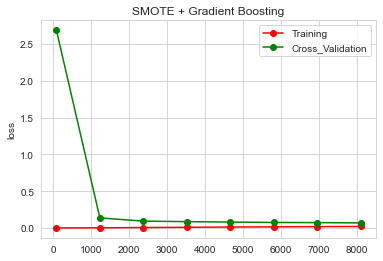

,Accuracy,F1,AUC,Speed(s)
Random Forest,0.943073,0.830226,0.981154,6.751461
SMOTE + Gradient Boosting,0.970056,0.906089,0.992427,14.785111


In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
x_res,y_res=SMOTE(random_state=101).fit_resample(x_train,y_train)
model=GradientBoostingClassifier(n_estimators=909,max_depth=3,max_features=0.6,subsample=0.9,learning_rate=0.06,random_state=101)
title='SMOTE + Gradient Boosting'
form=modeling(x_res,y_res,model,title)
learning_curve_score(model,title)
learning_curve_loss(model,title)
form

<h3>利用Random Search找出XGBoost之最佳參數</h3>

In [138]:
xgb_params={
    'xgbclassifier__n_estimators':randint(100,1000),
    'xgbclassifier__subsample':[0.5,0.6,0.7,0.8,0.9,1],
    'xgbclassifier__colsample_bytree':[0.5,0.6,0.7,0.8,0.9,1],
    'xgbclassifier__learning_rate':[0.01,0.03,0.05,0.07,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'xgbclassifier__gamma':[0.1,0.3,0.5,0.7,0.9,1,2,3,4,5,6,7,8,9,10],
    'xgbclassifier__max_depth':randint(3,20),
    'xgbclassifier__random_state':[101]
}
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
xgb_smote_pipe=make_pipeline(SMOTE(random_state=101),XGBClassifier())
xgb_smote_optimal=RandomizedSearchCV(xgb_smote_pipe,xgb_params,n_iter=10,cv=k,scoring='f1',n_jobs=-1)
xgb_smote_optimal.fit(x_train,y_train)
print(xgb_smote_optimal.best_params_)
print(xgb_smote_optimal.best_score_)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:27:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'xgbclassifier__colsample_bytree': 0.6, 'xgbclassifier__gamma': 3, 'xgbclassifier__learning_rate': 0.03, 'xgbclassifier__max_depth': 5, 'xgbclassifier__n_estimators': 859, 'xgbclassifier__random_state': 101, 'xgbclassifier__subsample': 0.9}
0.9143867703731683


<h3>XGBoost建模</h3>

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:39:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


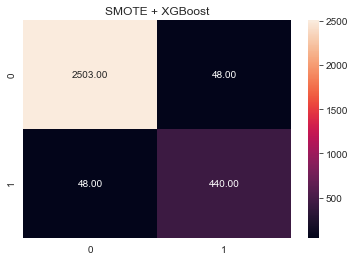

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2551
           1       0.90      0.90      0.90       488

    accuracy                           0.97      3039
   macro avg       0.94      0.94      0.94      3039
weighted avg       0.97      0.97      0.97      3039

Accuracy:0.97
F1 score:0.90
AUC:0.99
Times:6.08


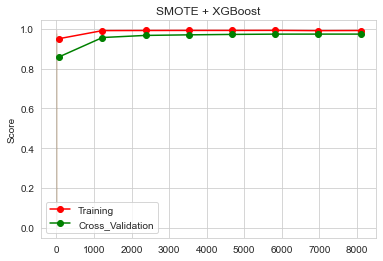

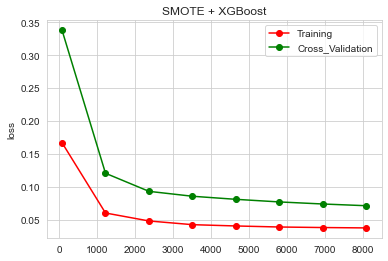

,Accuracy,F1,AUC,Speed(s)
Random Forest,0.943073,0.830226,0.981154,6.751461
SMOTE + Gradient Boosting,0.970056,0.906089,0.992427,14.785111
SMOTE + XGBoost,0.968411,0.901639,0.992525,6.079530


In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
x_res,y_res=SMOTE(random_state=101).fit_resample(x_train,y_train)
model=XGBClassifier(n_estimators=859,max_depth=5,colsample_bytree=0.7,subsample=0.9,gamma=3,learning_rate=0.03,random_state=101)
title='SMOTE + XGBoost'
form=modeling(x_res,y_res,model,title)
learning_curve_score(model,title)
learning_curve_loss(model,title)
form

<h3>模型成效</h3>

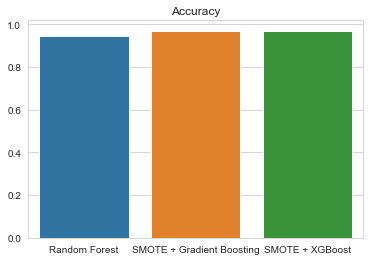

In [148]:
sns.set_style('whitegrid')
sns.barplot(x=list(accuracy.keys()),y=list(accuracy.values()))
plt.title('Accuracy')
plt.show()

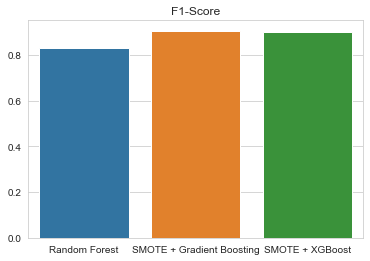

In [149]:
sns.set_style('whitegrid')
sns.barplot(x=list(f1.keys()),y=list(f1.values()))
plt.title('F1-Score')
plt.show()

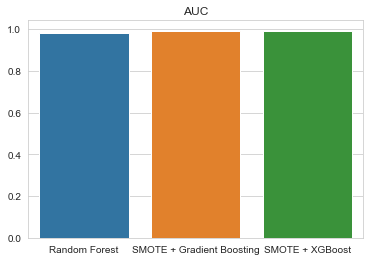

In [150]:
sns.set_style('whitegrid')
sns.barplot(x=list(auc.keys()),y=list(auc.values()))
plt.title('AUC')
plt.show()

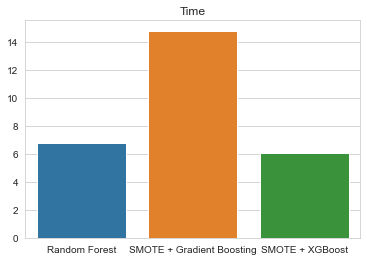

In [151]:
sns.set_style('whitegrid')
sns.barplot(x=list(speed.keys()),y=list(speed.values()))
plt.title('Time')
plt.show()

* 上面三個模型都有不錯的表現，但當中又以XGBoost表現較為平穩。

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:43:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


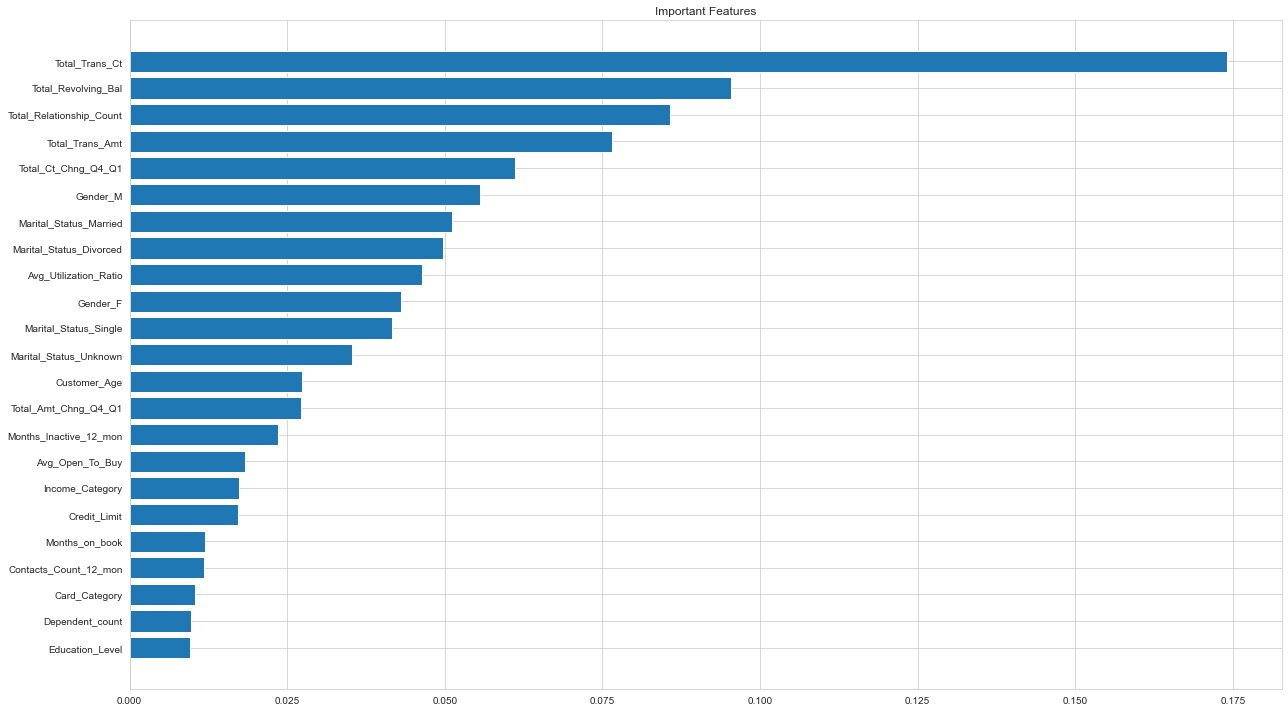

In [152]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=101)
x_res,y_res=SMOTE(random_state=101).fit_resample(xtrain,ytrain)
XGB=XGBClassifier(n_estimators=859,max_depth=5,colsample_bytree=0.7,subsample=0.9,gamma=3,learning_rate=0.03,random_state=101)
XGB.fit(x_res,y_res)
importance=XGB.feature_importances_
indices=np.argsort(importance)
feature=data.drop(['Attrition_Flag'],axis=1).columns.tolist()
feat_imp=np.array(feature)[indices]
values=importance[indices]
y_ticks=np.arange(0,len(feature))
fig,ax=plt.subplots(figsize=(18,10))
ax.barh(y_ticks,values)
ax.set_yticklabels(feat_imp)
ax.set_yticks(y_ticks)
plt.title('Important Features')
fig.tight_layout()
plt.show()


* 由於XGBoost為三者之中，表現較為穩定的model，因此可以藉由feature importance的功能來找出當中較為重要的特徵。此功能不僅可做為特徵工程中，資料降維的一種方法，亦可以提升整題模型表現。
* 不過一般而言，特徵保留越多越好，除非今天特徵數達到上千或過於複雜時，才會考慮進行feature selection等降維等方式進行降維。
* 由結果也可發現，一年來的交易次數總額量，為該模型中最重要的特徵，與先前推論相符。

<h2>End</h2>
<h2>Thanks for watching</h2>